In [16]:
import os, sys
from scipy.integrate import solve_ivp

In [17]:
import numpy as np
from tqdm import tqdm

In [18]:
import matplotlib.pyplot as plt

In [19]:
cwd = os.getcwd()
cwd_ujoin = cwd.split("\\")[:-2]
basedir = "\\".join(cwd_ujoin)
sys.path.append(basedir)

In [20]:
from attitude.rigid_body import attitude_rate

In [21]:
def xdot(x, u, I, **params):
    qdot, wdot = attitude_rate(x[:4], x[4:], u, I)
    return np.hstack((qdot, wdot))

In [22]:
def predict(x, u, I, start, end, **solver_opts):
    fx = lambda t, y: xdot(y, u, I)
    sol = solve_ivp(fx, [start, end], x, rtol = 1e-5, **solver_opts)
    return sol.y.flatten()

In [23]:
q0 = [1, 0, 0, 0]

In [24]:
w0 = [0.0, 0.0, np.deg2rad(1.0)]

In [25]:
x0 = np.hstack((q0, w0))
u0 = np.array([0.0, 0.0, 0.0])

In [35]:
t_start = 0
t_end = 180
dt = 0.1
t_vec = np.arange(t_start, t_end + dt, dt)

In [36]:
I = np.diag([10.0, 10.0, 100.0])

In [37]:
x = x0
u = u0
x_history = np.zeros((len(t_vec), len(x)))
solver_opts = dict(t_eval=[0])

for idx, t in enumerate(t_vec):
    x_history[idx, :] = x
    start = t
    end = t + dt
    solver_opts['t_eval'] = [end]
    xnew = predict(x, u, I, start, end, **solver_opts)
    x = xnew

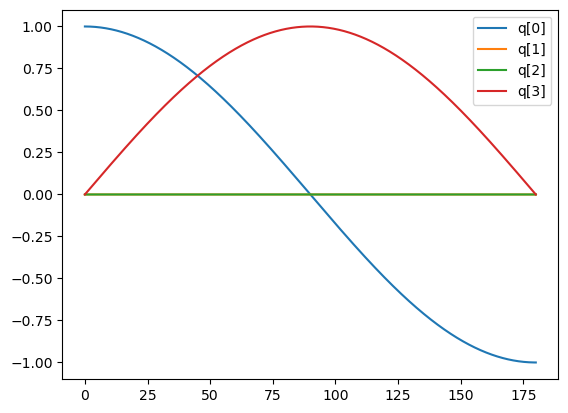

In [38]:
plt.plot(t_vec, x_history[:, :4])
plt.legend(["q[0]", "q[1]", "q[2]", "q[3]"])

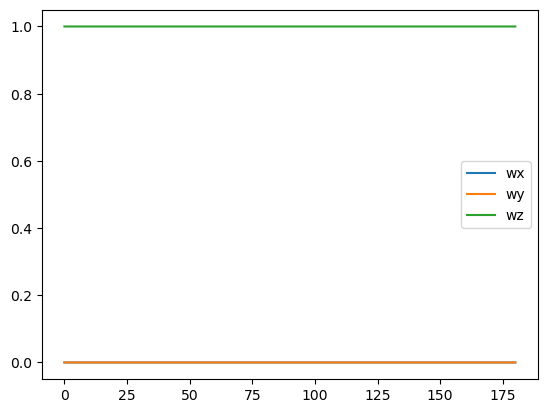

In [39]:
plt.plot(t_vec, np.rad2deg(x_history[:, 4:]))
plt.legend(['wx', 'wy', 'wz'])